In [1]:
# reference https://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting


# In general, a learning problem considers a set of n samples of data and then 
# tries to predict properties of unknown data. If each sample is more than a single number and, 
# for instance, a multi-dimensional entry (aka multivariate data), 
# it is said to have several attributes or features.




In [2]:
# two high level classes of ML

# supervised learning, in which the data comes with additional attributes that we want to predict 

# classification: samples belong to two or more classes and we want to learn from already labeled data 
# how to predict the class of unlabeled data. 
# An example of a classification problem would be handwritten digit recognition, 
# in which the aim is to assign each input vector to one of a finite number of discrete categories. 
# Another way to think of classification is as a discrete (as opposed to continuous) form of 
# supervised learning where one has a limited number of categories and for each of the n samples provided, 
# one is to try to label them with the correct category or class.

# regression: if the desired output consists of one or more continuous variables, 
# then the task is called regression. An example of a regression problem would be the prediction 
# of the length of a salmon as a function of its age and weight.

In [3]:
# unsupervised learning, in which the training data consists of a set of input vectors x without 
# any corresponding target values. 

# The goal in such problems may be to discover groups of similar examples within the data, 
# where it is called clustering, or to determine the distribution of data within the input space, 
# known as density estimation, or to project the data from a high-dimensional space down to two or 
# three dimensions for the purpose of visualization 

In [4]:
# Loading an example dataset 

# scikit-learn comes with a few standard datasets, 
# for instance the iris and digits datasets for classification and 
# the diabetes dataset for regression.

# lets play around with it 

from sklearn import datasets
# lets see what all attributes/method does datasets supports 
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [5]:
iris = datasets.load_iris()
# we store data in .data member
# in the case of supervised problem, 
# one or more response variables are stored in the .target member.
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
# type of iris is sklearn.utils.Bunch 
type(iris)

sklearn.utils.Bunch

In [7]:
# lets load digits data 
digits = datasets.load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
type(digits)

sklearn.utils.Bunch

In [9]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
# we get shape of data (X, y)
digits.data.shape

(1797, 64)

In [11]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
# target would have same value as that X from the data 
digits.target.shape

(1797,)

In [13]:
# reference https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

# lets play around with this data 

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import classifiers and performance metrics
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split


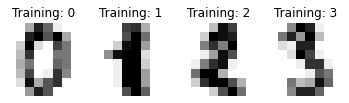

In [14]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.
# For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(1, 4)

# we get all the images abd their respective labels 
images_and_labels = list(zip(digits.images, digits.target))

for i in range(4):
    axes[i].set_axis_off()
    axes[i].imshow(images_and_labels[i][0], cmap=plt.cm.gray_r, interpolation='nearest')
    axes[i].set_title('Training: %i' % images_and_labels[i][1])

In [15]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
# but as data is already in required form we shall continue
# and create a classifier
classifier = svm.SVC(gamma=0.001)

In [16]:
# Lets Split data into train and test subsets
# turn random off so that we can use the later half to check prediction 
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.5, shuffle=False)

In [17]:
# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [18]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

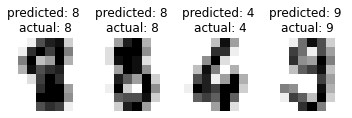

In [19]:
_, axes = plt.subplots(1, 4)
images_and_predictions_real = list(zip(digits.images[digits.target.shape[0]//2:], predicted, y_test ))
for i in range(4):
    axes[i].set_axis_off()
    axes[i].imshow(images_and_predictions_real[i][0], cmap=plt.cm.gray_r, interpolation='nearest')
    title = "predicted: {p} \nactual: {a}".format(p=images_and_predictions_real[i][1],a=images_and_predictions_real[i][2])
    axes[i].set_title(title)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [

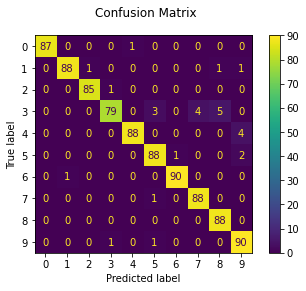

In [20]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()

In [22]:
# Model persistence 
# It is possible to save a model in scikit-learn by using Python’s built-in persistence model, pickle: 
import pickle
s = pickle.dumps(classifier)
type(s)

bytes

In [25]:
# In the specific case of scikit-learn, it may be more interesting to use joblib’s replacement for pickle (joblib.dump & joblib.load), 
# which is more efficient on big data but it can only pickle to the disk and not to a string:

from joblib import dump, load
dump(classifier, 'filename.joblib') 
type(classifier)

sklearn.svm._classes.SVC

In [24]:
cls = load('filename.joblib')
type(cls)

sklearn.svm._classes.SVC